#Steps in machine learning:
##1.preprocess + EDA + feature selection
##2.Extract input and output cols
##3.Scale the value
##4.Train the model
##5.evaluate the model/model selection
##6.Deploy the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Book1.csv")

In [3]:
df


,s.no,cgpa,IQ,placed
0,1,7.8,87,1
1,2,5.6,65,0
2,3,7.8,82,1
3,4,9.8,90,1
4,5,6.7,69,0
...,...,...,...,...
95,96,8.0,78,1
96,97,6.8,78,0
97,98,7.6,78,1
98,99,5.4,60,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s.no    100 non-null    int64  
 1   cgpa    100 non-null    float64
 2   IQ      100 non-null    int64  
 3   placed  100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df

,cgpa,IQ,placed
0,7.8,87,1
1,5.6,65,0
2,7.8,82,1
3,9.8,90,1
4,6.7,69,0
...,...,...,...
95,8.0,78,1
96,6.8,78,0
97,7.6,78,1
98,5.4,60,0


In [8]:
df.head()

,cgpa,IQ,placed
0,7.8,87,1
1,5.6,65,0
2,7.8,82,1
3,9.8,90,1
4,6.7,69,0


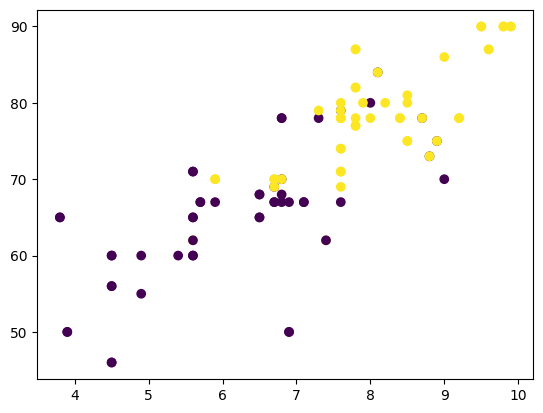

In [9]:
plt.scatter(df['cgpa'],df['IQ'],c=df['placed'])

In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
x

,cgpa,IQ
0,7.8,87
1,5.6,65
2,7.8,82
3,9.8,90
4,6.7,69
...,...,...
95,8.0,78
96,6.8,78
97,7.6,78
98,5.4,60


In [12]:
y

,placed
0,1
1,0
2,1
3,1
4,0
...,...
95,1
96,0
97,1
98,0


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [14]:

x_train

,cgpa,IQ
19,8.7,78
78,6.8,70
30,8.1,84
33,7.3,78
71,8.4,78
...,...,...
46,8.0,80
49,7.8,87
48,7.6,80
29,6.8,68


In [15]:

y_train

,placed
19,0
78,1
30,0
33,0
71,1
...,...
46,0
49,1
48,1
29,0


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [17]:
x_train

array([[ 1.10481114,  0.64400443],
       [-0.22586472, -0.15321575],
       [ 0.68459771,  1.24191956],
       [ 0.12431314,  0.64400443],
       [ 0.89470443,  0.64400443],
       [-0.43597143, -0.3525208 ],
       [-0.99625601, -0.45217332],
       [ 1.31491786, -0.15321575],
       [-1.20636272, -1.14974098],
       [ 0.96474   ,  0.84330947],
       [-0.43597143, -0.65147837],
       [-0.85618487, -0.45217332],
       [-1.06629158, -1.14974098],
       [-0.29590029, -0.25286828],
       [-1.83668287, -1.54835107],
       [ 0.96474   ,  0.34504686],
       [ 0.19434871, -0.95043593],
       [ 1.10481114,  0.64400443],
       [ 1.17484672,  0.14574181],
       [-0.15582915, -2.14626621],
       [-0.22586472,  0.64400443],
       [-1.55654058, -1.14974098],
       [ 0.68459771,  1.24191956],
       [-1.06629158, -0.05356323],
       [-0.22586472,  0.64400443],
       [-0.22586472, -0.45217332],
       [ 0.33441986, -0.45217332],
       [-0.43597143, -0.65147837],
       [ 0.33441986,

In [18]:
x_test = scaler.transform(x_test)

In [19]:
x_test

array([[-0.015758  , -0.45217332],
       [ 1.94523801,  1.8398347 ],
       [ 0.33441986,  0.24539434],
       [ 0.33441986,  0.64400443],
       [ 1.94523801,  1.8398347 ],
       [ 0.474491  ,  1.04261452],
       [-2.2568963 , -2.14626621],
       [ 0.474491  ,  0.54435191],
       [-1.83668287, -1.14974098],
       [-1.06629158, -0.65147837],
       [ 0.61456214,  0.64400443],
       [ 1.31491786,  1.44122461],
       [ 1.454989  ,  0.64400443],
       [-0.29590029, -0.45217332],
       [-1.83668287, -2.5448763 ],
       [ 1.454989  ,  0.64400443],
       [ 1.24488229,  0.34504686],
       [-2.32693187, -0.65147837],
       [-0.85618487, -0.15321575],
       [ 0.474491  ,  0.54435191]])

In [20]:
from sklearn.linear_model import LogisticRegression


In [21]:
clf = LogisticRegression()

In [22]:
clf.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_prediction = clf.predict(x_test)

In [24]:
y_prediction

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [25]:
y_test

,placed
26,0
39,1
42,1
63,1
88,1
51,1
34,0
7,1
59,0
50,0


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_prediction)

0.95

<Axes: >

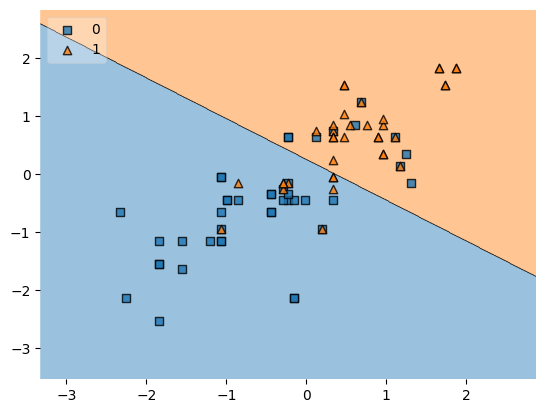

In [28]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)




In [29]:
import pickle


In [30]:
pickle.dump(clf,open('model.pkl','wb'))